# **Upload Dataset**

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/loan-prediction-problem-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-prediction-problem-dataset


# **Show Dataset**

In [34]:
import pandas as pd

# Replace 'train_u6lujuX_CVtuZ9i.csv' with the actual file name if different
df = pd.read_csv(path + "/train_u6lujuX_CVtuZ9i.csv")

# Show first few rows
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Dataset Overview**

In [35]:
# 🔎 Step 1: Dataset Overview
df.info()
df.describe()
print("Loan Status Value Counts:\n", df['Loan_Status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Loan Status Value Counts:
 Loan_Status
Y    422
N    192
Name: count, dtype: int64


# **Data Cleaning and Preprocessing**

In [36]:
# 🧹 Step 2: Data Cleaning – Handle Missing Values

# Fill missing categorical values with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical column with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Drop remaining missing values (if any)
df.dropna(inplace=True)

# **Removing Warnings**

In [37]:
#removing or hiding warnings

import warnings
warnings.filterwarnings('ignore')

# **Encoding Categorical Variables**

In [38]:
# 🔁 Step 3: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']:
    df[col] = le.fit_transform(df[col])


# **Exploratory Data Analysis (EDA)**

**Loan Distribution Status**

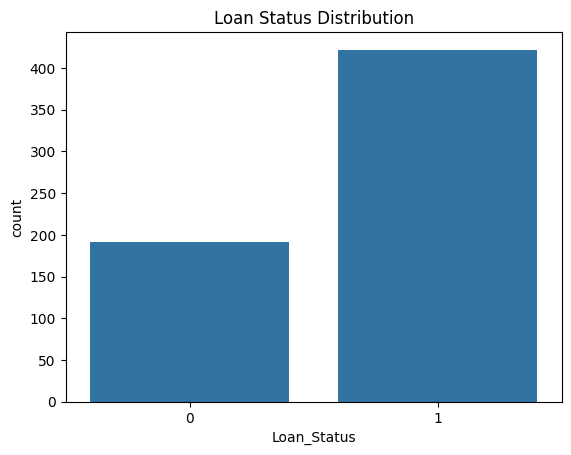

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loan Status Distribution
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

**Income vs Loan Amount**

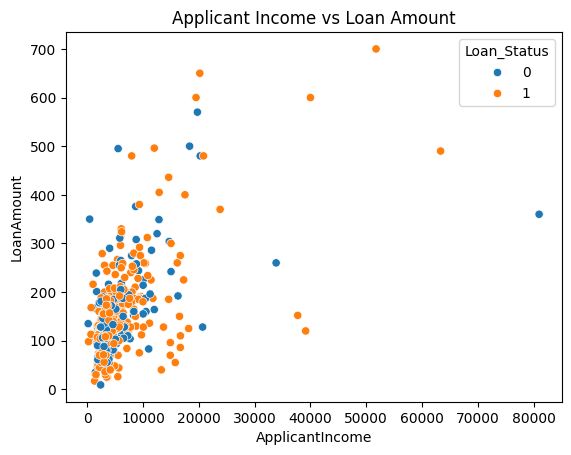

In [40]:
# Applicant Income vs Loan Amount
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title("Applicant Income vs Loan Amount")
plt.show()

**Loan Amount by Education**

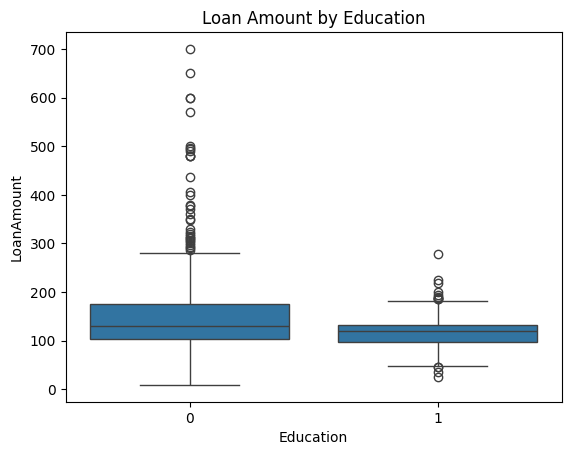

In [41]:
# Loan Amount by Education
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title("Loan Amount by Education")
plt.show()

**Credit History vs Loan Status**

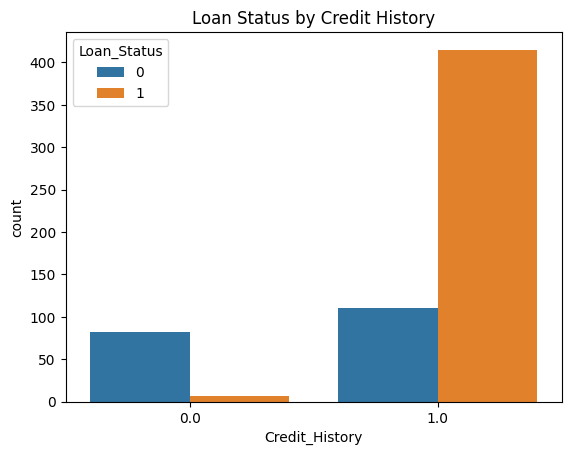

In [42]:
# Credit History vs Loan Status
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loan Status by Credit History")
plt.show()

# **Train/Test Split**

In [43]:
# 🤖 Step 5: Model Training (Logistic Regression & Decision Tree)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 📈 Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and label
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Applying Logistic Regression**

In [44]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Logistic Regression Evaluation
lr_preds = lr_model.predict(X_test)
print("📊 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))


📊 Logistic Regression
Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**Decision Tree**

In [45]:
# 📈 Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Decision Tree Evaluation
dt_preds = dt_model.predict(X_test)
print("\n📊 Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))


📊 Decision Tree
Accuracy: 0.6910569105691057
Confusion Matrix:
 [[23 20]
 [18 62]]
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123



**Feature Importance**

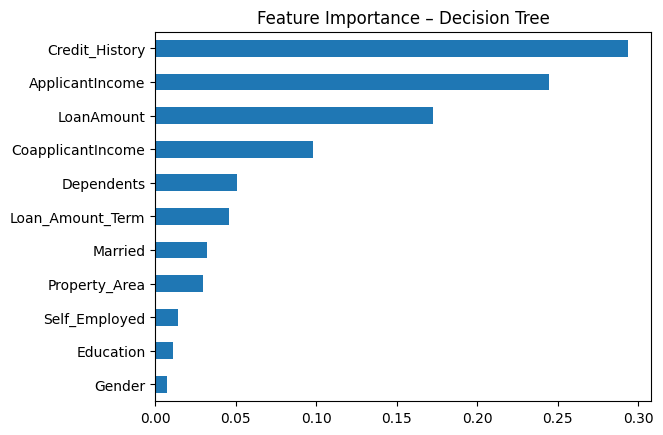

In [46]:
# 📌 Optional: Feature Importance for Decision Tree
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance – Decision Tree")
plt.show()

# **Save your trained model in the notebook:**

In [47]:
import pickle

# Save the Logistic Regression model (or Decision Tree if preferred)
with open("loan_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)  # or dt_model

# **Download the model from Colab:**

In [48]:
from google.colab import files
files.download("loan_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **🔍 Project: Loan Approval Prediction System**

This project aims to predict whether a loan will be approved. The dataset is sourced from Kaggle: Loan Prediction Problem.

# **✅ 1. Dataset Import**

The notebook begins by installing the kagglehub package and downloading the dataset directly from Kaggle. This avoids manual file uploads and ensures you're working with the latest version of the dataset.

After downloading, the CSV file (usually named train_u6lujuX_CVtuZ9i.csv) is read into a pandas DataFrame. This DataFrame contains both numerical and categorical features along with the target column: Loan_Status.

# **✅ 2. Exploratory Data Analysis (EDA)**

The notebook includes:

Checking for missing values in each column.

Displaying data types of features.

Viewing the distribution of target labels (Approved or Not Approved).

Understanding how categorical features (like Gender, Married, Education) affect loan status.

Visualizations (e.g., bar plots) help understand data distribution and imbalances.

# **✅ 3. Data Cleaning & Preprocessing**

To prepare the data for modeling:

Missing values are filled using appropriate strategies (like mode or median).

Categorical features are encoded using Label Encoding or One-Hot Encoding.

Unnecessary features such as Loan_ID are removed.

This step ensures the data is fully numeric and suitable for feeding into ML models.

# **✅ 4. Feature Scaling**

If models like Logistic Regression are used, feature scaling is applied using StandardScaler. This brings all numerical values to a similar scale (mean=0, std=1) to improve model performance.

# **✅ 5. Model Training**

The data is split into training and test sets. Then, one or more of the following models are trained:

Logistic Regression

Decision Tree Classifier

The training is followed by prediction on the test set.

# **✅ 6. Model Evaluation**

To assess performance, the following metrics are used:

Accuracy

Precision

Recall

F1-Score

Confusion Matrix

These metrics help identify how well the model predicts loan approvals.

**✅ 7. Feature Importance**

For tree-based models like Decision Trees or Random Forest:

Feature importance is computed using .feature_importances_ and visualized as a horizontal bar chart.

For Logistic Regression:

Feature importance is interpreted using the absolute value of model coefficients.

# **✅ 8. Saving the Model**

The best-performing model is saved using pickle. This allows you to reuse the trained model later without retraining.

# **✅ 9. Loading the Model & Making Predictions**

The saved model is reloaded, and sample input values are passed to it to predict whether a loan would be approved. This simulates real-world use of the model in production or user interface applications.

# **✅ 10. Deployment**

Although not shown in the notebook, this model can be deployed using:

Streamlit for creating a user-friendly interface

Web hosting platforms or integrated into other systems (e.g., banking apps)

# **📌 Summary**

This notebook demonstrates a full ML pipeline:

Real-world dataset

Cleaning and preprocessing

Model training and evaluation

Feature importance analysis

Model saving and reloading for inference